**Universidad Nacional de Colombia**

Modulo: Introduccion al Machine Learning con Python
  
Autoría:

*   Daniel Avila Garcia
*   Juan Felipe Caro


# Clasificador de imagenes -- Fashion MNIST

<div style='display: flex:'>
<img src='https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png' width=400>
</div>

# 0. Librerias a usar

In [ ]:
# Usage of tensorflow is only for data importation pourposes
import tensorflow as tf
import tensorflow_datasets as tfds

# Needed libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

# 1. Entendimiento del negocio


## 1.1. Descripción del problema:

En este proyecto, abordamos el desafío de clasificar imágenes de prendas de vestir utilizando el conjunto de datos FASHION MNIST. El problema principal radica en desarrollar un modelo de aprendizaje automático capaz de reconocer y categorizar diferentes tipos de prendas, como camisetas, pantalones, zapatos y otros artículos de moda en imágenes en blanco y negro. Este proceso de clasificación es fundamental para diversas aplicaciones, desde la recomendación de moda en línea hasta la optimización de inventarios en tiendas minoristas. El objetivo principal es lograr una clasificación precisa de las prendas de vestir, lo que permitirá mejorar la experiencia del cliente y proporcionar un valor significativo al negocio

## 1.2. Objetivo general:
Los objetivo principal de este proyecto es entrenar un modelo de clasificación de imágenes para el conjunto de datos FASHION MNIST.


## 1.4. Objetivos especificos:
* Desarrollar un modelo de clasificación de imágenes con una precisión mayor al 85% en el conjunto de datos FASHION MNIST.
* Crear una app que permita a los usuarios hacer un dibujo sobre un lienzo y recibir predicciones sobre su tipo.

# 2. Entendimiento de los datos:

## 2.1. Sobre el conjunto de datos

* Contexto:

    Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando, que consta de un conjunto de entrenamiento de 60,000 ejemplos y un conjunto de prueba de 10,000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28 píxeles, asociada a una etiqueta de una de las 10 clases.
    Zalando ha creado Fashion-MNIST como un reemplazo directo del conjunto de datos MNIST original para evaluar algoritmos de aprendizaje automático. Comparte el mismo tamaño de imagen y la estructura de divisiones para entrenamiento y prueba.

    El conjunto de datos MNIST original contiene principalmente dígitos escritos a mano y es muy apreciado por la comunidad de Inteligencia Artificial/Aprendizaje Automático/Ciencia de Datos, que lo utiliza como referencia para validar sus algoritmos. De hecho, MNIST es a menudo el primer conjunto de datos que prueban los investigadores. Se dice que: "Si no funciona en MNIST, no funcionará en absoluto"

* Contexto

    Cada imagen tiene una altura y ancho de 28 píxeles, lo que suma un total de 784 píxeles. Cada píxel tiene un solo valor asociado que indica la luminosidad u oscuridad del píxel, donde números más altos representan mayor oscuridad. Este valor del píxel es un número entero que varía de 0 a 255. Los conjuntos de datos de entrenamiento y prueba tienen 785 columnas en total. La primera columna contiene las etiquetas de clase que representan la prenda de vestir. Las columnas restantes contienen los valores de píxeles asociados a la imagen correspondiente.

* Labels:

    Cada uno de los ejemplos de entrenamiento y prueba esta asignados a uno de estas etiquetas:
    *  0 -> T-shirt/top
    * 1 -> Trouser
    * 2 -> Pullover
    * 3 -> Dress
    * 4 -> Coat
    * 5 -> Sandal
    * 6 -> Shirt
    * 7 -> Sneaker
    * 8 -> Bag
    * 9 -> Ankle boot



## 2.2. Exploración de los datos:

Primero descargamos los data sets con las imagenes para entrenamiento y pruba

In [ ]:
# Gets the train data
!gdown 1rminmJ2df9TfNJMdoL6SFvOOrmg0cC-v

Downloading...
From: https://drive.google.com/uc?id=1rminmJ2df9TfNJMdoL6SFvOOrmg0cC-v
To: /content/fashion-mnist_train.csv
100% 133M/133M [00:03<00:00, 40.6MB/s]


In [ ]:
# Gets the test data
!gdown 1k5R1zIE7n5PJbqPSrtWlJB28Sd11Ekrr

Downloading...
From: https://drive.google.com/uc?id=1k5R1zIE7n5PJbqPSrtWlJB28Sd11Ekrr
To: /content/fashion-mnist_test.csv
100% 22.2M/22.2M [00:00<00:00, 60.9MB/s]


Seguido de estos se cargan al notebooks como objetos DataFrame de pandas

In [ ]:
train = pd.read_csv('fashion-mnist_train.csv')
train.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [ ]:
test = pd.read_csv('fashion-mnist_test.csv')
test.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0


Como podemos ver son arreglos de: $n*785$. La primera columna corresponde a la clase de la imagenes y lo siguen 784 pixeles que corresponde a imagenes de $28*28$ en escala de gris (valores entre 0 y 255)

In [ ]:
# Every image size is 28x28 px and every pixel has a value between 0 and 255 (gray scale)
28*28

784

Cada numero entre 0 y 9 esta asociado a una de las siguientes etiquetas como se muestra a continuación:

In [ ]:
# Class names
class_names = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot',}

Imprimimos algunas de las imagenes

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(12, 15))

for i in range(25):
    img_arr = train.sample(1).values.reshape(785)
    label = img_arr[0]
    pixels = img_arr[1:]
    row = i // 5
    column = i % 5
    axes[row, column].imshow(pixels.reshape((28, 28)), cmap=plt.cm.binary)
    axes[row, column].set_title(class_names[label])


In [ ]:
(
    train
    .label
    .replace(class_names)
    .value_counts()
)

Pullover       6000
Ankle boot     6000
Shirt          6000
T-shirt/top    6000
Dress          6000
Coat           6000
Sandal         6000
Bag            6000
Sneaker        6000
Trouser        6000
Name: label, dtype: int64

In [ ]:
(
    test
    .label
    .replace(class_names)
    .value_counts()
)

T-shirt/top    1000
Trouser        1000
Pullover       1000
Dress          1000
Bag            1000
Shirt          1000
Sandal         1000
Coat           1000
Sneaker        1000
Ankle boot     1000
Name: label, dtype: int64

# 3. Preparación de los datos

Se plantea un problema de aprendizaje supervisado, por esta razón vamos a separar los DataFrame de prueba y entrenamiento en sus respectivas etiquetas y caracteristicas.

In [ ]:
# X and y from train dataframe
X_train = train.drop('label', axis=1)
y_train = train.label

# X and y from test dataframe
X_test = test.drop('label', axis=1)
y_test = test.label

In [ ]:
print('Tamaño features de train: ', X_train.shape)
print('Tamaño labels de train ', y_train.shape)
print('Tamaño features de test: ', X_test.shape)
print('Tamaño labels de test: ', y_test.shape)

Tamaño features de train:  (60000, 784)
Tamaño labels de train  (60000,)
Tamaño features de test:  (10000, 784)
Tamaño labels de test:  (10000,)


Es recomendable normalizar los valores de píxeles al entrenar algoritmos de clasificación de imágenes. La normalización ayuda a estabilizar el entrenamiento, mejorar la generalización y prevenir el sobreajuste al ajustar los valores de píxeles en un rango específico. Tomamos cada pixel y llevamos su respectivo valor a un rango [0, 1]

In [ ]:
# Normalize data
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

X_train_norm = pd.DataFrame(scaler.fit_transform(X_train))
X_test_norm = pd.DataFrame(scaler.fit_transform(X_test))

Observamos nuestros datos normalizados

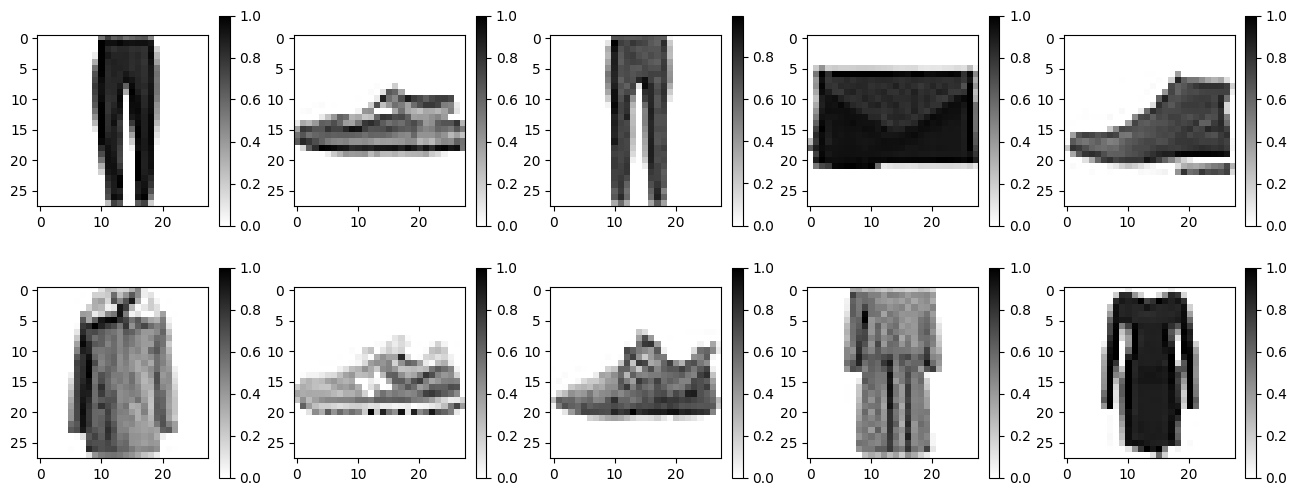

In [ ]:
# Show normalized data
fig, axes = plt.subplots(2, 5, figsize=(16, 6))

for i in range(10):
    pixels = X_train_norm.sample(1).values.reshape(784)

    row = i // 5
    column = i % 5

    im = axes[row, column].imshow(pixels.reshape((28, 28)), cmap=plt.cm.binary)
    fig.colorbar(im, ax = axes[row, column])

In [ ]:
X_train_norm

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.006098,0.008811,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.286275,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.627451,0.635294,0.639216,0.529412,0.368627,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [ ]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

Por ultimo, se realizará una reducción de la dimensionalidad de los datos por medio de PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_norm)

[Text(0.5, 0, 'Componente'), Text(0, 0.5, 'Varianza Acumulada')]

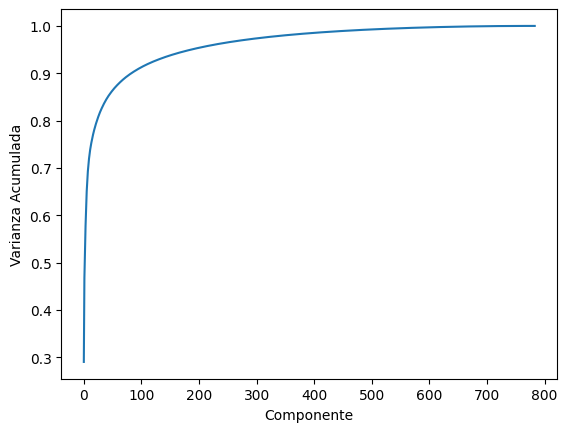

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set(xlabel='Componente', ylabel='Varianza Acumulada')

Se observa que con al rededor de 200 componentes puedo explicar el 95% de mis datos. Obtengamos este resultado de forma precisa:

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = (cumulative_variance < 0.95).sum() + 1
n_components

188

In [ ]:
pca = PCA(n_components=n_components).fit(X_train_norm)

In [ ]:
X_train_t = pca.transform(X_train_norm)
X_train_r = pca.inverse_transform(X_train_t)

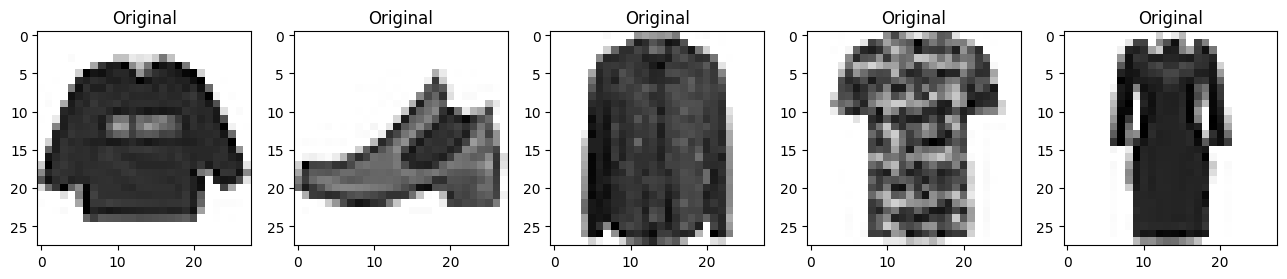

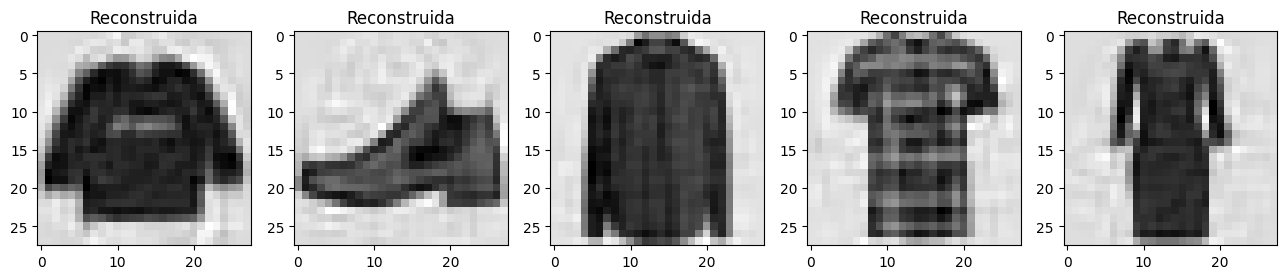

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 3))

for i in range(5):
    pixels = X_train_norm.values[i].reshape(784)
    column = i % 5
    axes[column].imshow(pixels.reshape((28, 28)), cmap=plt.cm.binary)
    axes[column].set_title('Original')

fig, axes = plt.subplots(1, 5, figsize=(16, 3))

for i in range(5):
    pixels = X_train_r[i].reshape(784)
    column = i % 5
    axes[column].imshow(pixels.reshape((28, 28)), cmap=plt.cm.binary)
    axes[column].set_title('Reconstruida')

# 4. Modelamiento

## 4.1. KNN

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# params = {
#     'n_neighbors': [5, 10, 15, 20],
#     'metric': ['euclidean', 'manhattan']
# }

In [ ]:
# knn = neighbors.KNeighborsClassifier()
# grid_search = GridSearchCV(knn, params, cv=3)
# grid_search.fit(X_train_r, y_train)

Como primera aproximación en la clasificación de los datos se propone entrenar 3 modelos, de la siguiente forma:
- Modelo 1: se usará para el entrenamiento los pixeles originales.
- Modelo 2: se usará para el entrenamiento los pixeles normalizados.
- Modelo 3: se usará en el entrenamiento los pixeles normalizados y reducidos en su dimencionalidad.
Hacer un grid search requiere un costo computaciónal muy elevado. Por esta razon, no se realizara. En cambio, como desde un inicio sabemos que nuestro problema de clasificación se resume en 10 clases, podemos tomar como el parametro de vecinos igual a 10.

In [ ]:
# n_neighbors
n = 10

# knn instances
knn_1 = neighbors.KNeighborsClassifier(n_neighbors=n)
knn_2 = neighbors.KNeighborsClassifier(n_neighbors=n)
knn_3 = neighbors.KNeighborsClassifier(n_neighbors=n)

# Models training
knn_1.fit(X_train, y_train)
knn_2.fit(X_train_norm, y_train)
knn_3.fit(X_train_r, y_train)

# Model prediction
y_pred1 = knn_1.predict(X_test)
y_pred2 = knn_2.predict(X_test_norm)
y_pred3 = knn_3.predict(X_test_norm)

In [ ]:
# Class names
target_names = list(class_names.values())

# Score
report_1 = (classification_report(y_test, y_pred1, digits=4, target_names=target_names))
report_2 = (classification_report(y_test, y_pred2, digits=4, target_names=target_names))
report_3 = (classification_report(y_test, y_pred3, digits=4, target_names=target_names))

# Print
print("Score del modelo entrenado con pixeles originales: \n\n", report_1)
print("Score del modelo entrenado con pixeles normalizados: \n\n", report_2)
print("Score del modelo entrenado con pixeles reducidos dimencionalmente: \n\n", report_3)

Score del modelo entrenado con pixeles originales: 

               precision    recall  f1-score   support

 T-shirt/top     0.7696    0.8750    0.8189      1000
     Trouser     0.9877    0.9650    0.9762      1000
    Pullover     0.7516    0.8110    0.7802      1000
       Dress     0.9068    0.8850    0.8957      1000
        Coat     0.7942    0.7990    0.7966      1000
      Sandal     0.9938    0.7980    0.8852      1000
       Shirt     0.6741    0.5770    0.6218      1000
     Sneaker     0.8573    0.9490    0.9008      1000
         Bag     0.9754    0.9520    0.9636      1000
  Ankle boot     0.8883    0.9620    0.9237      1000

    accuracy                         0.8573     10000
   macro avg     0.8599    0.8573    0.8563     10000
weighted avg     0.8599    0.8573    0.8563     10000

Score del modelo entrenado con pixeles normalizados: 

               precision    recall  f1-score   support

 T-shirt/top     0.7687    0.8740    0.8180      1000
     Trouser     0.987

Como se observa, los mejores valores se obtiene al usar el conjunto de datos que fue reducido dimencionalmente por medio de PCA.

## 4.2 Decision Three Classifier

Se realiza una experimentacion primaria en la que se revisan y prueban manualmente distintos valores de parametros, logrando obtener valores con mejor desempeño.

Posteriormente se prueban hiperparametros especificos en los distintos tipos de datos disponibles(reales, normalizados, dimensionalidad reducida).

Finalmente se realiza una validadcion cruzada para determinar cual es el mejor conjunto.

Los hiperparametros mas importante bajo los cuales se debe experiementar son: Max Depth, criterion, min_impurity decrease, min sample leafs.

### 4.2.1. Estimacion del hiperparametro Max Depth

A continuacion se observa como se estimo el mejor hiperparametro (Max Depth), y se grafica el error generalizado y de entrenamiento, a medida que este aumenta.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Función para visualizar la curva de aprendizaje a partir
# del error de entrenamiento y de generalización.
def plot_learning_curve(train_error, generalization_error):
  n = len(train_error)
  if len(train_error) != len(generalization_error):
    print("Las secuencias de error de entrenamiento y generalización deben tener el mismo tamaño.")
    return

  balance_point = np.array(generalization_error).argmin() + 1
  plt.figure(figsize = (8, 5), dpi = 105)

  plt.plot(range(1, n + 1), train_error, label="Entrenamiento")
  plt.plot(range(1, n + 1), generalization_error, label="Generalización")
  plt.xticks(range(0, n + 1, 2))
  plt.xlabel("Profundidad máxima")
  plt.ylabel("Error")
  y_min, y_max = plt.gca().get_ylim()
  plt.vlines(balance_point, y_min, y_max, colors = ['red'], linestyles = ['dashdot'])
  plt.ylim([y_min, y_max])
  plt.text(balance_point + 1, 0.165, 'Punto de balance')
  plt.legend();

In [ ]:
# Números enteros de 1 a 20 como posibles valores del hiperparámetro de profundidad.
max_depth_values = np.arange(1, 21, 1)

# Arreglos vacíos para almacenar el error de entrenamiento y el de generalización.
train_error = np.empty(len(max_depth_values))
generalization_error = np.empty(len(max_depth_values))


for depth in max_depth_values:
    # Entrenamos un árbol de decisión para cada valor de profundidad.
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    decision_tree.fit(X_train, y_train)

    # Almacenamos el error de entrenamiento y de generalización por cada árbol.
    train_error[depth - 1] = (1 - decision_tree.score(X_train, y_train))
    generalization_error[depth - 1] = (1 - decision_tree.score(X_test, y_test))

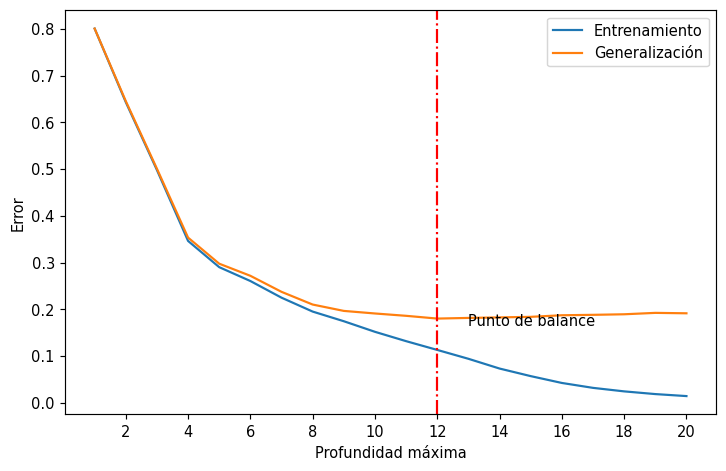

In [ ]:
plot_learning_curve(train_error, generalization_error)

### 4.2.2. Comparacion de modelos

Se entrenan 3 modelos con parametros escogidos tras la experimentación manual:


- Modelo 1: se usará para el entrenamiento los pixeles originales.
- Modelo 2: se usará para el entrenamiento los pixeles normalizados.
- Modelo 3: se usará en el entrenamiento los pixeles normalizados y reducidos en su dimencionalidad.

Esto con el objetivo de saber cual tiene un menor error y asi escoger el modelo para realizar validación cruzada.

In [ ]:
decision_three_1 = DecisionTreeClassifier( max_depth=12,
                                            min_impurity_decrease=0.0001,
                                             criterion= 'entropy',
                                            min_samples_leaf=8
                                             )
decision_three_2 = DecisionTreeClassifier( max_depth=12,
                                            min_impurity_decrease=0.0001,
                                             criterion= 'entropy',
                                            min_samples_leaf=8
                                             )
decision_three_3 = DecisionTreeClassifier( max_depth=12,
                                            min_impurity_decrease=0.0001,
                                             criterion= 'entropy',
                                            min_samples_leaf=8
                                             )

# Models training
decision_three_1.fit(X_train, y_train)
decision_three_2.fit(X_train_norm, y_train)
decision_three_3.fit(X_train_r, y_train)

# Model prediction
y_pred1 = decision_three_1.predict(X_test)
y_pred2 = decision_three_2.predict(X_test_norm)
y_pred3 = decision_three_3.predict(X_test_norm)

In [ ]:
# Class names
target_names = list(class_names.values())

# Score
report_1 = (classification_report(y_test, y_pred1, digits=4, target_names=target_names))
report_2 = (classification_report(y_test, y_pred2, digits=4, target_names=target_names))
report_3 = (classification_report(y_test, y_pred3, digits=4, target_names=target_names))

# Print
print("Score del modelo entrenado con pixeles originales: \n\n", report_1)
print("Score del modelo entrenado con pixeles normalizados: \n\n", report_2)
print("Score del modelo entrenado con pixeles reducidos dimencionalmente: \n\n", report_3)

Score del modelo entrenado con pixeles originales: 

               precision    recall  f1-score   support

 T-shirt/top     0.7537    0.8050    0.7785      1000
     Trouser     0.9419    0.9570    0.9494      1000
    Pullover     0.7134    0.7120    0.7127      1000
       Dress     0.8438    0.8480    0.8459      1000
        Coat     0.7192    0.7530    0.7357      1000
      Sandal     0.9138    0.8910    0.9023      1000
       Shirt     0.6154    0.5360    0.5730      1000
     Sneaker     0.8447    0.9030    0.8729      1000
         Bag     0.9427    0.9210    0.9317      1000
  Ankle boot     0.9158    0.8920    0.9037      1000

    accuracy                         0.8218     10000
   macro avg     0.8205    0.8218    0.8206     10000
weighted avg     0.8205    0.8218    0.8206     10000

Score del modelo entrenado con pixeles normalizados: 

               precision    recall  f1-score   support

 T-shirt/top     0.7542    0.8040    0.7783      1000
     Trouser     0.943

Se escogen todos los datos sin normalizacion o redimensionado y ser realiza la validacion cruzada


### 4.2.3. Validacion cruzada con Grid Search CV


In [ ]:
# Los hiperparámetros deben estar en forma de diccionario.
param_grid = {'criterion':     ['gini','entropy'],
              'min_impurity_decrease': [0.00001,0.0001,0.001,0.01,0.1,],
              'min_samples_leaf': [1,2,4,8,10],
              'max_features': range(20,100, 20),
              'max_depth': [12,],
              }

param_grid

{'criterion': ['gini', 'entropy'],
 'min_impurity_decrease': [1e-05, 0.0001, 0.001, 0.01, 0.1],
 'min_samples_leaf': [1, 2, 4, 8, 10],
 'max_features': range(20, 100, 20),
 'max_depth': [12]}

In [ ]:
# Búsqueda en cuadrícula de hiperparámetros.
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(DecisionTreeClassifier( ),
                   param_grid=param_grid,
                   return_train_score=True,
                   cv=3
                   )

grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [12],
                         'max_features': range(20, 100, 20),
                         'min_impurity_decrease': [1e-05, 0.0001, 0.001, 0.01,
                                                   0.1],
                         'min_samples_leaf': [1, 2, 4, 8, 10]},
             return_train_score=True)

In [ ]:
# Mejores parámetros identificados.
print(grid_clf.best_params_)

{'criterion': 'entropy', 'max_depth': 12, 'max_features': 80, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 1}


In [ ]:
grid_clf.best_score_

0.8063666666666666

## 4.3 Random Forest

Se entrena el algoritmo Random Forest, en el que se combinan los resultados de distintos arboles de decision para tener un resultado mas robusto. Este modelo para los mismos hiperparametros definidos en el arbol de decisición previo. Este proceso se realiza 3 veces para los data sets definidos previamente, con el objetivo de establecer las mejores métricas.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
random_forest_1 =  RandomForestClassifier(n_estimators=100,
                                       max_depth=12,
                                       min_impurity_decrease=0.0001,
                                       criterion= 'entropy',
                                       min_samples_leaf=8)
random_forest_2 =  RandomForestClassifier(n_estimators=100,
                                       max_depth=12,
                                       min_impurity_decrease=0.0001,
                                       criterion= 'entropy',
                                       min_samples_leaf=8)
random_forest_3 =  RandomForestClassifier(n_estimators=100,
                                       max_depth=12,
                                       min_impurity_decrease=0.0001,
                                       criterion= 'entropy',
                                       min_samples_leaf=8)

# Models training
random_forest_1.fit(X_train, y_train)
random_forest_2.fit(X_train_norm, y_train)
random_forest_3.fit(X_train_r, y_train)

# Model prediction
y_pred1 = random_forest_1.predict(X_test)
y_pred2 = random_forest_2.predict(X_test_norm)
y_pred3 =random_forest_3.predict(X_test_norm)

In [ ]:
# Class names
target_names = list(class_names.values())

# Score
report_1 = (classification_report(y_test, y_pred1, digits=4, target_names=target_names))
report_2 = (classification_report(y_test, y_pred2, digits=4, target_names=target_names))
report_3 = (classification_report(y_test, y_pred3, digits=4, target_names=target_names))

# Print
print("Score del modelo entrenado con pixeles originales: \n\n", report_1)
print("Score del modelo entrenado con pixeles normalizados: \n\n", report_2)
print("Score del modelo entrenado con pixeles reducidos dimencionalmente: \n\n", report_3)

Score del modelo entrenado con pixeles originales: 

               precision    recall  f1-score   support

 T-shirt/top     0.7909    0.8510    0.8198      1000
     Trouser     0.9857    0.9640    0.9747      1000
    Pullover     0.7744    0.7690    0.7717      1000
       Dress     0.8733    0.9170    0.8946      1000
        Coat     0.7566    0.8550    0.8028      1000
      Sandal     0.9727    0.9250    0.9482      1000
       Shirt     0.7443    0.5560    0.6365      1000
     Sneaker     0.8995    0.9130    0.9062      1000
         Bag     0.9417    0.9700    0.9557      1000
  Ankle boot     0.9146    0.9420    0.9281      1000

    accuracy                         0.8662     10000
   macro avg     0.8654    0.8662    0.8638     10000
weighted avg     0.8654    0.8662    0.8638     10000

Score del modelo entrenado con pixeles normalizados: 

               precision    recall  f1-score   support

 T-shirt/top     0.7852    0.8480    0.8154      1000
     Trouser     0.989

## 4.4 Red neuronal

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [ ]:
neural_network_1 = MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    hidden_layer_sizes=(150,50),
                    learning_rate='adaptive',
                    early_stopping = True,
                    alpha=0.01,
                    )
neural_network_2 = MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    hidden_layer_sizes=(150,50),
                    learning_rate='adaptive',
                    early_stopping = True,
                    alpha=0.01,
                    )
neural_network_3 =MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    hidden_layer_sizes=(150,50),
                    learning_rate='adaptive',
                    early_stopping = True,
                    alpha=0.01,
                    )

# Models training
neural_network_1.fit(X_train, y_train)
neural_network_2.fit(X_train_norm, y_train)
neural_network_3.fit(X_train_r, y_train)

# Model prediction
y_pred1 = neural_network_1.predict(X_test)
y_pred2 = neural_network_2.predict(X_test_norm)
y_pred3 = neural_network_3.predict(X_test_norm)

In [ ]:
# Class names
target_names = list(class_names.values())

# Score
report_1 = (classification_report(y_test, y_pred1, digits=4, target_names=target_names))
report_2 = (classification_report(y_test, y_pred2, digits=4, target_names=target_names))
report_3 = (classification_report(y_test, y_pred3, digits=4, target_names=target_names))

# Print
print("Score del modelo entrenado con pixeles originales: \n\n", report_1)
print("Score del modelo entrenado con pixeles normalizados: \n\n", report_2)
print("Score del modelo entrenado con pixeles reducidos dimencionalmente: \n\n", report_3)

Score del modelo entrenado con pixeles originales: 

               precision    recall  f1-score   support

 T-shirt/top     0.8202    0.8120    0.8161      1000
     Trouser     0.9753    0.9860    0.9806      1000
    Pullover     0.8273    0.7710    0.7981      1000
       Dress     0.9027    0.8910    0.8968      1000
        Coat     0.7260    0.8930    0.8009      1000
      Sandal     0.9644    0.9470    0.9556      1000
       Shirt     0.6994    0.5910    0.6407      1000
     Sneaker     0.9394    0.9140    0.9265      1000
         Bag     0.9622    0.9670    0.9646      1000
  Ankle boot     0.9292    0.9710    0.9496      1000

    accuracy                         0.8743     10000
   macro avg     0.8746    0.8743    0.8730     10000
weighted avg     0.8746    0.8743    0.8730     10000

Score del modelo entrenado con pixeles normalizados: 

               precision    recall  f1-score   support

 T-shirt/top     0.8247    0.8800    0.8515      1000
     Trouser     0.972

In [ ]:
# Los hiperparámetros deben estar en forma de diccionario.
param_grid = {'solver': ['adam'],
              'activation' : ['relu','tanh'],
              'max_iter' : [500,1000],
              'hidden_layer_sizes': [(100,50),(100,100),(150,100)],
              'alpha' : [0.0001,0.001,0.01,0.1],
              'learning_rate' : ['adaptive'],
              'early_stopping' : [True],
              }

param_grid

{'solver': ['adam'],
 'activation': ['relu', 'tanh'],
 'max_iter': [500, 1000],
 'hidden_layer_sizes': [(100, 50), (100, 100), (150, 100)],
 'alpha': [0.0001, 0.001, 0.01, 0.1],
 'learning_rate': ['adaptive'],
 'early_stopping': [True]}

In [ ]:
# Búsqueda en cuadrícula de hiperparámetros.
from sklearn.model_selection import GridSearchCV

NN_classifier_2 = MLPClassifier(
                    )
grid_clf = GridSearchCV(NN_classifier_2,
                   param_grid=param_grid,
                   return_train_score=True,
                   cv=3
                   )

grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [(100, 50), (100, 100),
                                                (150, 100)],
                         'learning_rate': ['adaptive'], 'max_iter': [500, 1000],
                         'solver': ['adam']},
             return_train_score=True)

In [ ]:
# Mejores parámetros identificados.
print(grid_clf.best_params_)

{'activation': 'relu', 'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (150, 100), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'adam'}


In [ ]:
print(grid_clf.best_score_)

0.8711333333333333


# 5. Evaluación

### Comparacion de metricas para los modelos entrenados

In [ ]:
import seaborn as sns

data_precision = {
    "precision": ['KNN', 'Decision Three Classifier', 'Random Forest', 'Neural Network(MLP)'],
    "values": [86.67, 82.00, 86.82, 89.25]
}

data_recall = {
    "recall": ['KNN', 'Decision Three Classifier', 'Random Forest', 'Neural Network(MLP)'],
    "values": [85.73, 82.14, 86.88, 89.23]
}

data_f1_score = {
    "f1-score": ['KNN', 'Decision Three Classifier', 'Random Forest', 'Neural Network(MLP)'],
    "values": [86.51, 82.02, 86.65, 89.13]
}

def metric_grafic(df, metric):
    plt.figure(figsize=(8, 4))
    sns.set(style="whitegrid")

    # Load bars graph
    barplot = sns.barplot(x=metric, y='values', data=df)

    titulo = metric.capitalize()
    plt.title(titulo, fontsize=18)
    plt.xlabel("Model", fontsize=14)
    plt.ylabel("Values (%)", fontsize=14)
    plt.xticks(fontsize=7, rotation=30)
    plt.yticks(fontsize=7)

    # Bars above labels
    for index, row in df.iterrows():
        value_as_percentage = f'{row["values"]:.2f}%'
        barplot.text(index, row['values'], value_as_percentage, color='black', ha="center", fontsize=10)

df_precision = pd.DataFrame(data_precision)
df_recall = pd.DataFrame(data_recall)
df_f1_score = pd.DataFrame(data_f1_score)

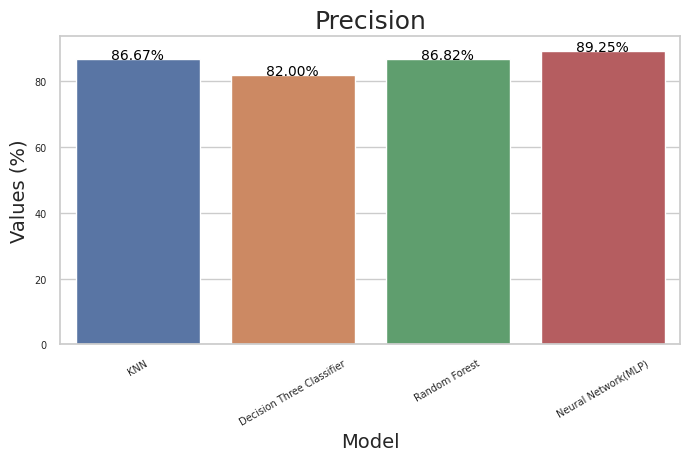

In [ ]:
metric_grafic(df_precision, "precision")

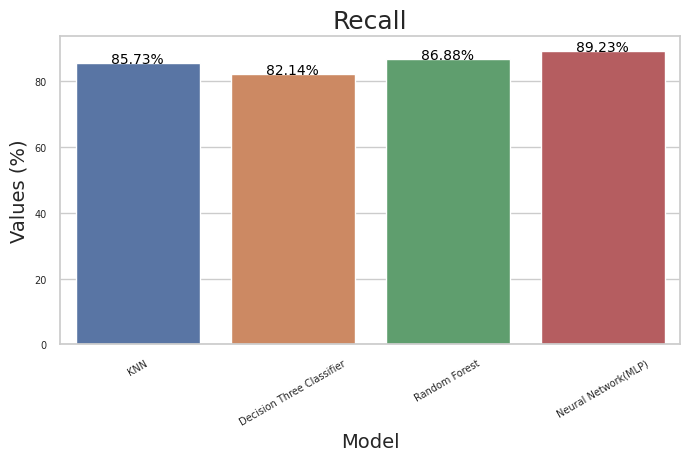

In [ ]:
metric_grafic(df_recall, "recall")

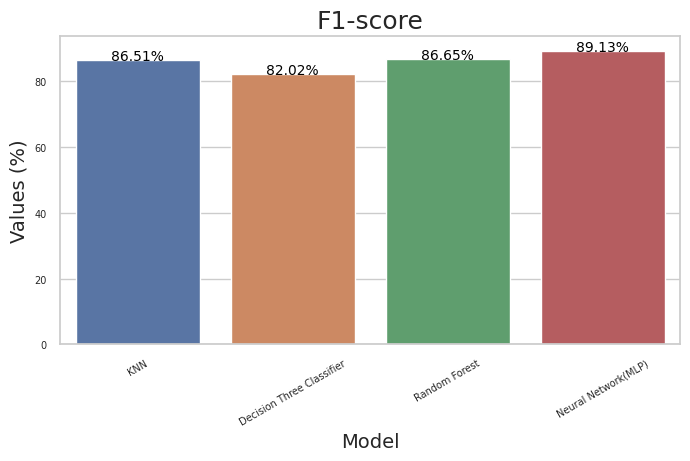

In [ ]:
metric_grafic(df_f1_score, "f1-score")

# 6. Exportar el modelo

En esta sección se exportan los modelos en formato .pkl para que puedan ser usados en la app

## 6.1 KNN

In [ ]:
from joblib import dump

# Save model to .pks
dump(knn_3, 'knn.pkl')

['knn.pkl']

## 6.2 Decision Three Classifier

In [ ]:
# Save model to .pks
dump(decision_three_1, 'tree.pkl')

['tree.pkl']

## 6.3 Random Forest

In [ ]:
# Save model to .pks
dump(random_forest_1, 'random_forest.pkl')

['random_forest.pkl']

## 6.4 Red Neuronal

In [ ]:
# Save model to .pks
dump(neural_network_2,  'nn.pkl')

['nn.pkl']

Universidad Nacional de Colombia

Modulo: Introduccion al Machine Learning con Python
  
Autoría:

*   Daniel Avila Garcia
*   Juan Felipe Caro
